<a href="https://colab.research.google.com/github/MavClarito/Emerging-Tech-2/blob/main/Clarito_Hands_on_Activity_6_2_Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.2 : Training Neural Networks


Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Hands-on Activity 6.2: Training Neural Networks** |
**Members:** | Clarito, Vincent Maverick
**Section** | CPE32S9
**Date Performed**: | 04/08/2024
**Date Submitted**: | 04/09/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the dataset

In [ ]:
filepath = '/content/drive/My Drive/Datasets/pima-indians-diabetes.csv'
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
121,6,111,64,39,0,34.2,0.260,24,0
193,11,135,0,0,0,52.3,0.578,40,1
701,6,125,78,31,0,27.6,0.565,49,1
461,1,71,62,0,0,21.8,0.416,26,0
510,12,84,72,31,0,29.7,0.297,46,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 22ms/step - loss: 0.7633 - accuracy: 0.5868 - val_loss: 0.7286 - val_accuracy: 0.5833
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7275 - accuracy: 0.6076 - val_loss: 0.7017 - val_accuracy: 0.5885
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.6250 - val_loss: 0.6800 - val_accuracy: 0.6094
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6250 - val_loss: 0.6623 - val_accuracy: 0.6198
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.6354 - val_loss: 0.6476 - val_accuracy: 0.6406
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6394 - accuracy: 0.6493 - val_loss: 0.6353 - val_accuracy: 0.6615
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.6545 - val_loss: 0.6249 - val_accuracy: 0.6719
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.
y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.5529956 ],
       [0.7771141 ],
       [0.40321907],
       [0.196903  ],
       [0.25651723],
       [0.4591135 ],
       [0.04037692],
       [0.3254066 ],
       [0.9059487 ],
       [0.2649282 ]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.792
roc-auc is 0.825


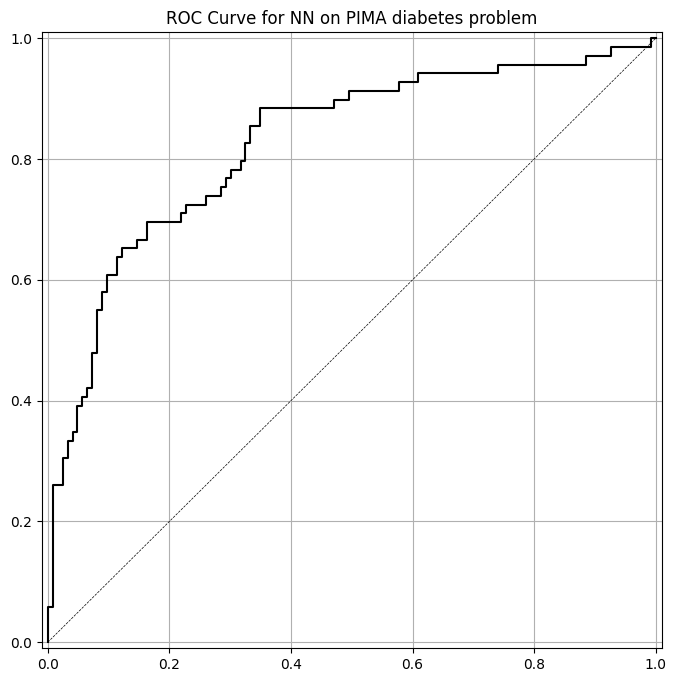

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

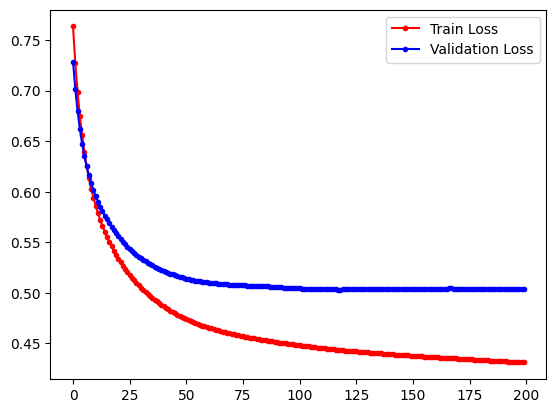

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?
- **In this graph it shows a downward trend line on train loss which means that the model is learning perfectly without overfitting. It also shows a downward trend on Validation loss which means it's performance improves over time although it gradually decreases.**

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
#1. Build a model with two hidden layers, each with 6 nodes
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50000)
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
#2.Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 63 (252.00 Byte)
Trainable params: 63 (252.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#3.Use a learning rate of .003 and train for 1500 epochs
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 12ms/step - loss: 0.6909 - accuracy: 0.6146 - val_loss: 0.6886 - val_accuracy: 0.6927
Epoch 2/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.6285 - val_loss: 0.6836 - val_accuracy: 0.6719
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.6302 - val_loss: 0.6788 - val_accuracy: 0.6719
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.6424 - val_loss: 0.6745 - val_accuracy: 0.6823
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.6389 - val_loss: 0.6704 - val_accuracy: 0.6979
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.6510 - val_loss: 0.6666 - val_accuracy: 0.7135
Epoch 7/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6458 - val_loss: 0.6631 - val_accuracy: 0.7188
Epoch

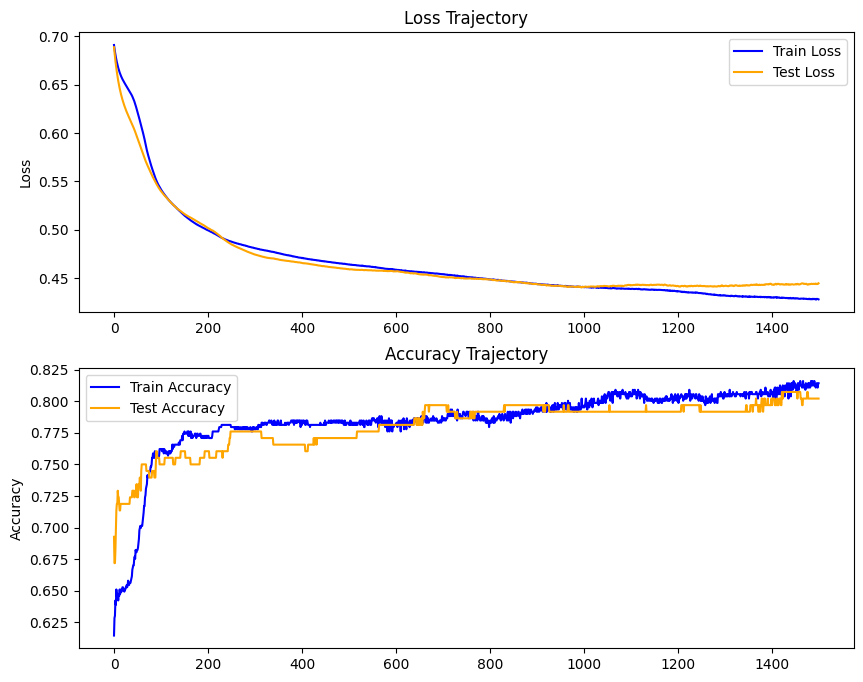

In [ ]:
#4. Graph the trajectory of the loss functions, accuracy on both train and test setg
train_loss = run_hist_1.history['loss']
test_loss = run_hist_1.history['val_loss']
train_accuracy = run_hist_1.history['accuracy']
test_accuracy = run_hist_1.history['val_accuracy']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[1].plot(train_accuracy, label='Train Accuracy', color='blue')
axes[1].plot(test_accuracy, label='Test Accuracy', color='orange')
axes[1].set_title('Accuracy Trajectory')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[0].plot(train_loss, label='Train Loss', color='blue')
axes[0].plot(test_loss, label='Test Loss', color='orange')
axes[0].set_title('Loss Trajectory')
axes[0].set_ylabel('Loss')
axes[0].legend()

Comments:
> This graph shows consistent values which means the model is performing well.
> Loss trajectory memorizes the training data but also generalizing well to unseen data and as you can see there are few datas are being unseen and in order to have better performance, increasing epoch would be good.

6/6 [==============================] - 0s 2ms/step


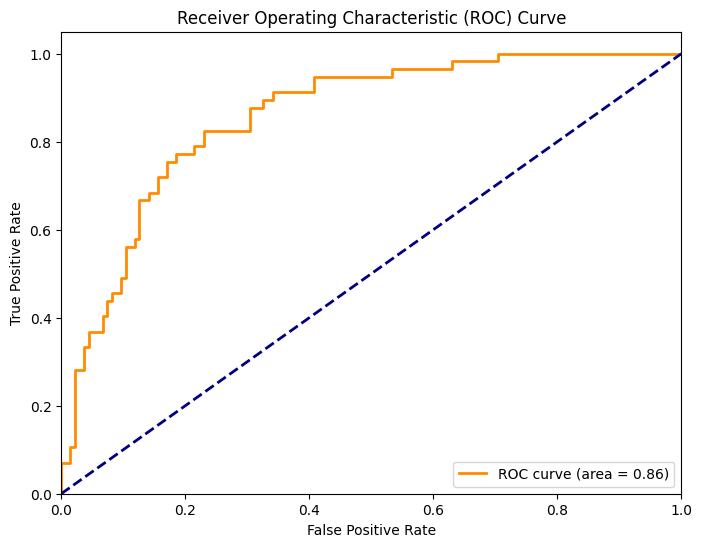

In [ ]:
#5. Plot the roc curve for the predictions
y_pred_proba = model.predict(X_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Comments:
> This graph shows that the model is performing better than the actual test variable which means its predicting values at high accuracy.

In [ ]:
#Use different learning rates, numbers of epochs, and network structures.
model  = Sequential([
    Dense(15, input_shape=(8,), activation="relu"),
    Dense(15, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(SGD(learning_rate=0.5), "binary_crossentropy", metrics=["accuracy"])

run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 1s 15ms/step - loss: 0.5953 - accuracy: 0.6771 - val_loss: 0.4662 - val_accuracy: 0.7708
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.5022 - accuracy: 0.7587 - val_loss: 0.4413 - val_accuracy: 0.7708
Epoch 3/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4781 - accuracy: 0.7587 - val_loss: 0.4923 - val_accuracy: 0.7448
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4817 - accuracy: 0.7760 - val_loss: 0.4200 - val_accuracy: 0.8125
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4556 - accuracy: 0.7795 - val_loss: 0.4808 - val_accuracy: 0.7500
Epoch 6/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4602 - accuracy: 0.7604 - val_loss: 0.4237 - val_accuracy: 0.7865
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4527 - accuracy: 0.7743 - val_loss: 0.4192 - val_accuracy: 0.7812
Epoch

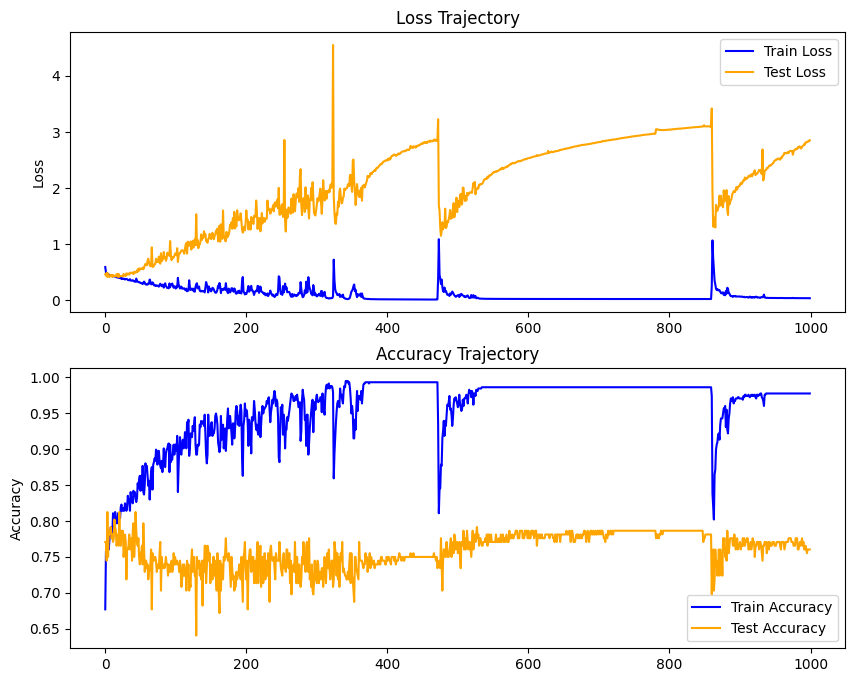

In [ ]:
#Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
train_loss = run_hist_1.history['loss']
test_loss = run_hist_1.history['val_loss']
train_accuracy = run_hist_1.history['accuracy']
test_accuracy = run_hist_1.history['val_accuracy']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[1].plot(train_accuracy, label='Train Accuracy', color='blue')
axes[1].plot(test_accuracy, label='Test Accuracy', color='orange')
axes[1].set_title('Accuracy Trajectory')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[0].plot(train_loss, label='Train Loss', color='blue')
axes[0].plot(test_loss, label='Test Loss', color='orange')
axes[0].set_title('Loss Trajectory')
axes[0].set_ylabel('Loss')
axes[0].legend()

Comments:
> This graph shows the how accurate both test and train variables are. There are instances where it fluctuates a lot.

6/6 [==============================] - 0s 2ms/step


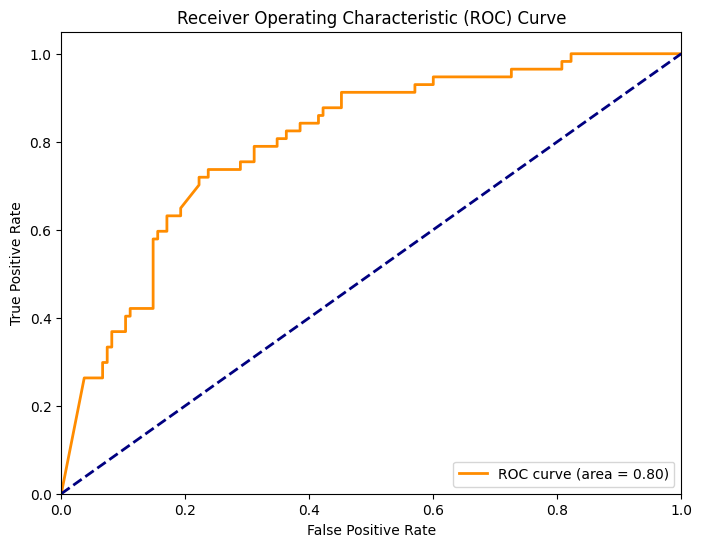

In [ ]:
y_pred_proba = model.predict(X_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Comments:
> This shows the same graph as the previous graph although if I run it again it overfits and it doesnt show significant change from the actual values to the predicting values.

#### Conclusion

> The provided code from this activity helped me implement a neural network model. This also helped me understand the use of learning models such as "relu" and "sigmoid". Sigmoid can be used for datasets/ variable that are classified as binary, one example is whether the patient has diabetes or not. Relu on the other hand is used for non- linear variables.